In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data ingestion

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Vidhi (Rinex AI july 2023) Minor Project 1/titanic_data_set.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(columns=["PassengerId"],inplace=True)

In [5]:
# Removed the column PassengerId as it is not significant in determining their survival

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#Filling the missing values (Cabin, Age, Embarked columns)

In [10]:
#Since Cabin column has max missing values instead of filling it we choose to omit it
df.drop(columns=["Cabin"],inplace=True)

In [11]:
# For Embarked column we fill the missing 2 values by it's mode

In [12]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [14]:
df["Embarked"].isnull().sum()

0

In [15]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

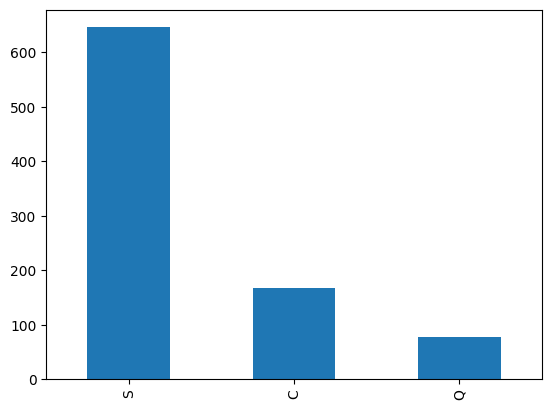

In [16]:
df["Embarked"].value_counts().plot(kind="bar")

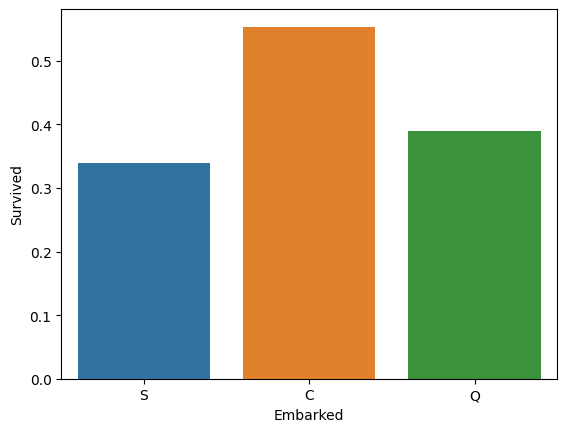

In [17]:
sns.barplot(x=df['Embarked'],y=df['Survived'],errorbar=None)
plt.show()

In [18]:
# From the above graphs we can conclude that most people were embarked at port "S"
# Whereas the the chances of survival for people embarking at port "C" are higher, then "Q" and least at "S"

In [19]:
# To fill up the missing Age values  divide the people into four groups based on their "Salutations":
# 1) Mrs (older female)
# 2) Miss (younger female)
# 3) Mr (older male)
# 4) Master (younger male)

# then the average of the 4 groups and filling accordingly

In [20]:
df["Salutation"]=df["Name"].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df["Salutation"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Salutation, Length: 891, dtype: object

In [21]:
df["Salutation"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Salutation, dtype: int64

In [22]:
# Creating a column gender with "Female"=1 "Male"=0

In [23]:
df['Gender']=df['Sex'].apply(lambda x:1 if "female" in x else 0).astype('int')

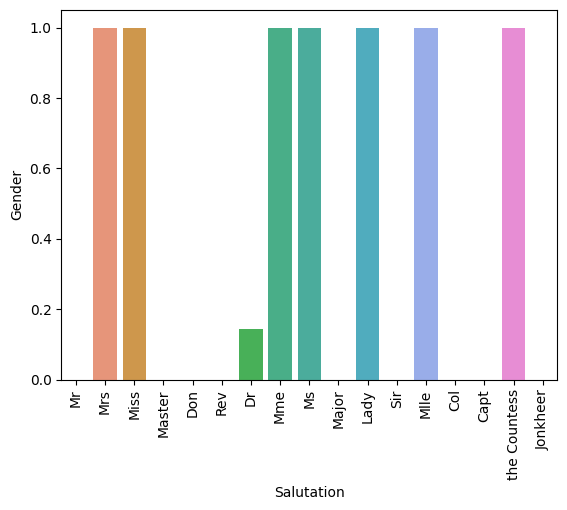

In [24]:
sns.barplot(x=df['Salutation'],y=df['Gender'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [25]:
# From the above graph we conclude that majority of doctors are male thus we group them into Mr(older male)

In [26]:
def group_titles(text):
  if text=='Mrs' or text=="Ms" or text=="Lady" or text=="the Countess":
    return "Mrs"
  elif text=="Mr" or text=="Don" or text=="Rev" or text=="Dr" or text=="Major" or text=="Sir" or text=="Col" or text=="Capt" or text=="Jonkheer":
    return "Mr"
  elif text=="Miss" or text=="Mme" or text=="Mlle":
    return "Miss"
  else:
    return text

In [27]:
df["Salutation"]=df["Salutation"].apply(group_titles)

In [28]:
df["Salutation"].value_counts()

Mr        538
Miss      185
Mrs       128
Master     40
Name: Salutation, dtype: int64

In [29]:
Sal_Group = df.groupby(by='Salutation')

In [30]:
Age_means = dict(Sal_Group['Age'].mean())

In [31]:
Age_means

{'Master': 4.574166666666667,
 'Miss': 21.818791946308725,
 'Mr': 33.02272727272727,
 'Mrs': 35.909909909909906}

In [32]:
df["Age"].fillna(-1,inplace=True)

In [33]:
def ageMean(record):
  sal = record['Salutation']
  age = record['Age']

  if age==-1:
    return int(Age_means[sal])
  else:
    return int(age)

In [34]:
df["Age"]=df.apply(ageMean, axis=1)

In [35]:
df["Age"].value_counts()

33    135
21     60
35     35
24     31
22     27
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Salutation    0
Gender        0
dtype: int64

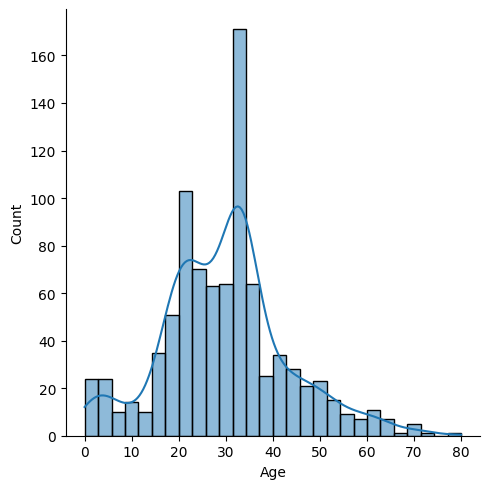

In [37]:
sns.displot(x=df['Age'],kde=True)

In [38]:
df["Ticket"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [39]:
df["Ticket"].value_counts()
# some tickets were purchased in groups thus the collective cost is mentioned in "Fare". we need to find fare per person

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [40]:
df["Ticket"]=df["Ticket"].apply(lambda x:x.split(' ')[-1])

In [41]:
fare_dict = dict(df["Ticket"].value_counts())

In [42]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation,Gender
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,21171,7.2500,S,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,3101282,7.9250,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Mr,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Miss,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,6607,23.4500,S,Miss,1
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Mr,0


In [43]:
def Ticket_price(record):
  ticket_no = record['Ticket']
  cost = record['Fare']

  return cost/fare_dict[ticket_no]

In [44]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [45]:
df["Fare"]=df.apply(Ticket_price, axis=1)

In [46]:
df["Fare"].value_counts()

13.0000    56
8.0500     49
7.7500     40
7.8958     38
10.5000    25
           ..
28.5000     1
14.0000     1
9.4750      1
21.6792     1
10.5167     1
Name: Fare, Length: 250, dtype: int64

<Figure size 800x600 with 0 Axes>

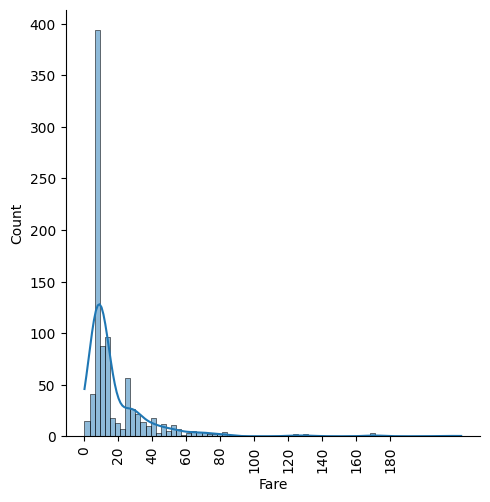

In [47]:
plt.figure(figsize=(8,6))
sns.displot(x=df['Fare'],kde=True)
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.show()

In [48]:
# Most people's fare was from 0 to 40

In [49]:
df1=df[df["Survived"]==1]
df0=df[df["Survived"]==0]

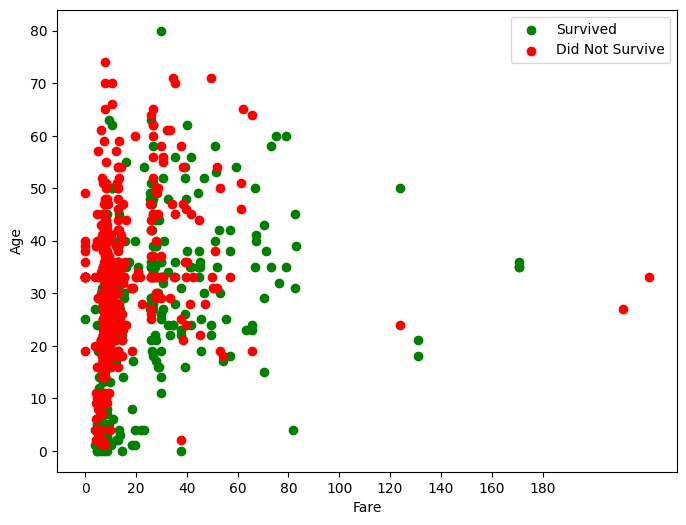

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(df1["Fare"],df1["Age"],label="Survived",color="g")
plt.scatter(df0["Fare"],df0["Age"],label="Did Not Survive",color="r")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.xticks(np.arange(0,200,20))
plt.legend(loc="upper right")
plt.show()

In [51]:
# People with fare between 0 to 20 had very low chances of survival among all age groups.
# People with fare between 20 to 60 had better chances of survival.
# People with fare between 60 to 80 and age group 20 to 50 had max chances of survival.

In [52]:
df["Family"]=df["SibSp"]+df["Parch"]
# Combining the Number of sibling, spouse, parents n children into a single column family

In [53]:
df["Family"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

<Axes: >

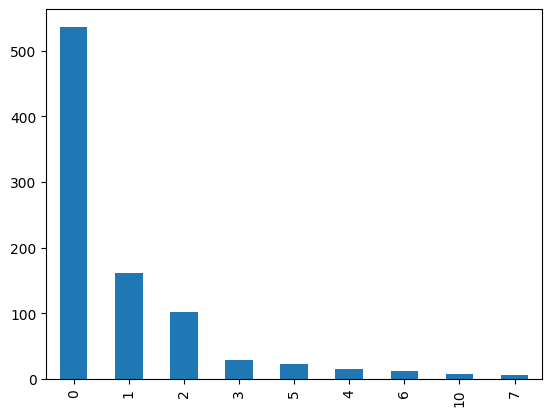

In [54]:
df["Family"].value_counts().plot(kind="bar")

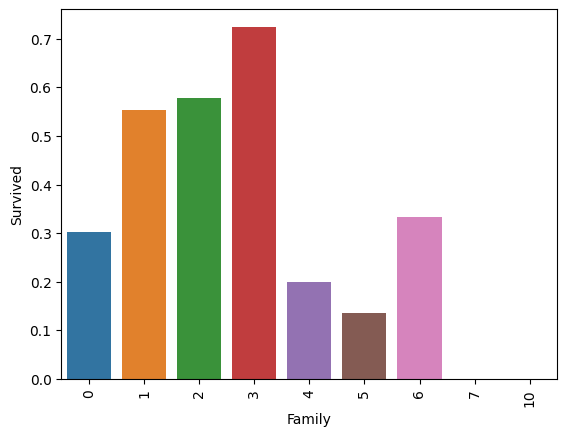

In [55]:
sns.barplot(x=df['Family'],y=df['Survived'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Majority of the people were traveling alone. some had 1 or 2 family members.
# People with 3 family members had the highest survival rate followed by people with 2 and 1 family member.
# People with 7 and 10 family members did not survive.

In [57]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

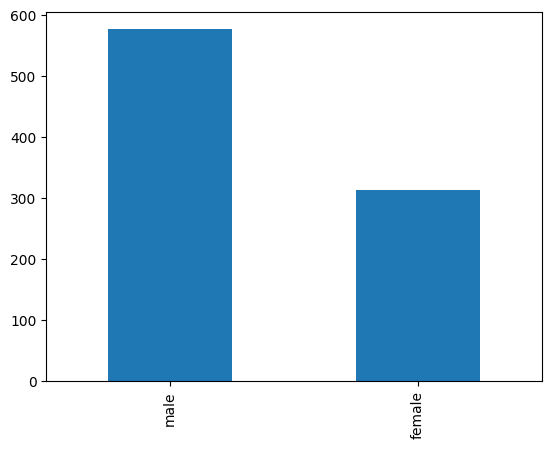

In [58]:
df["Sex"].value_counts().plot(kind="bar")

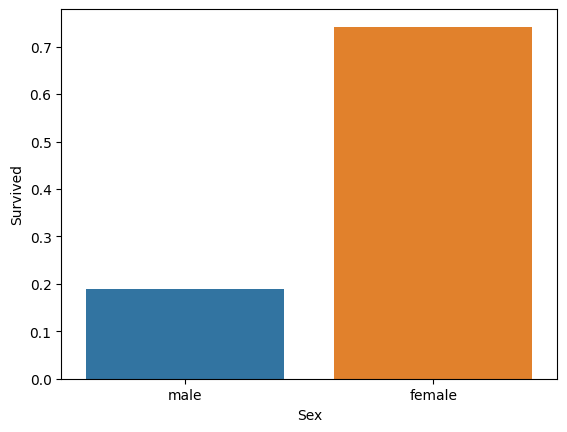

In [59]:
sns.barplot(x=df['Sex'],y=df['Survived'],errorbar=None)
plt.show()

In [60]:
# There were more male passangers than female.
# The chances of survival for female were higher for females than male.

In [61]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

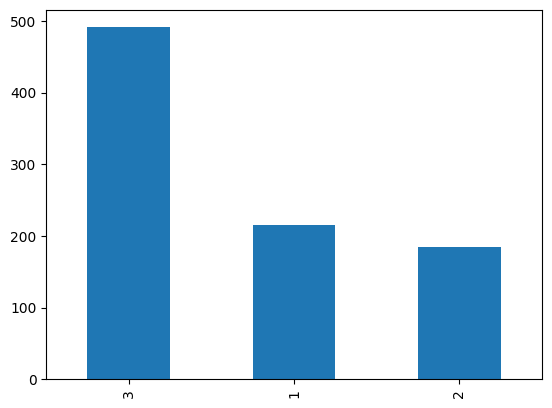

In [62]:
df["Pclass"].value_counts().plot(kind="bar")

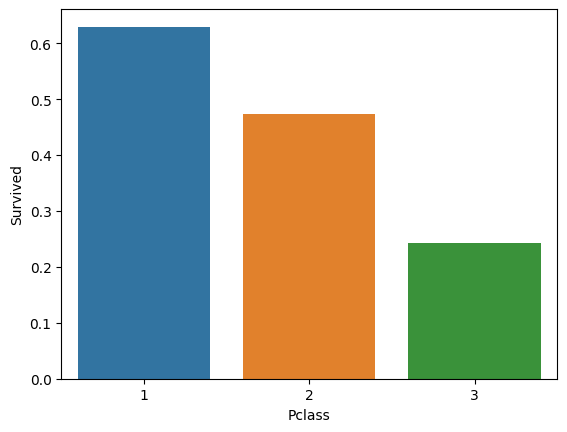

In [63]:
sns.barplot(x=df['Pclass'],y=df['Survived'],errorbar=None)
plt.show()

In [64]:
# Majority people belonged to "3rd" class then "1st" and least to "2nd".
# People in "1st" class had higher chances of survival followed by "2nd" class.
# "3rd" class had least chances of survival though being the most in number.

In [65]:
df["Salutation"].value_counts()

Mr        538
Miss      185
Mrs       128
Master     40
Name: Salutation, dtype: int64

<Axes: >

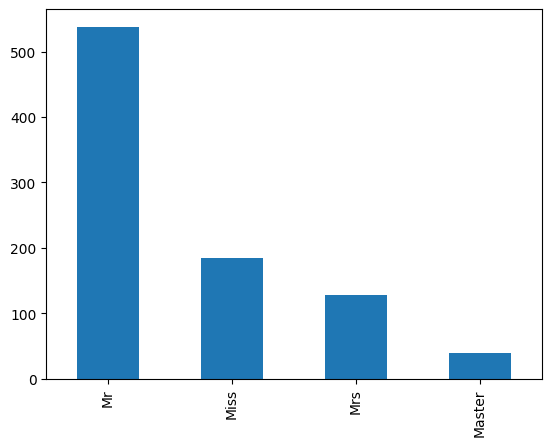

In [66]:
df["Salutation"].value_counts().plot(kind="bar")

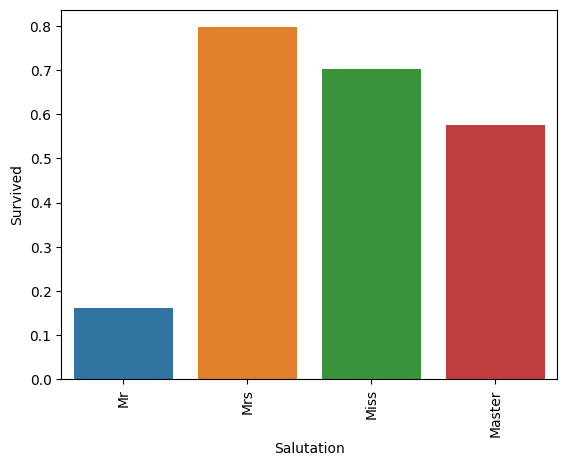

In [67]:
sns.barplot(x=df['Salutation'],y=df['Survived'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [68]:
# From "Gender" column's graph we saw that Male passender were most in number, among them Older Male(Mr) made up the most part of passangers.
# Among female, Younger Female(Miss) were more in number.
# Older Female(Mrs) had most survival chances followed by Miss and Master (young people)

In [69]:
df.drop(columns=["SibSp","Parch","Name","Ticket"],inplace=True)
# Since SibSp(sibling spouse), Parch(parents children), Name and Ticket are not required by us we drop them

In [70]:
df.sample()

,Survived,Pclass,Sex,Age,Fare,Embarked,Salutation,Gender,Family
735,0,3,male,28,8.05,S,Mr,0,0
